Testing if the inner product of two states seperated in distance is one

In [34]:
import iDEA as idea
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

In [12]:
x = np.linspace(-30,30,180)
v_int = idea.interactions.softened_interaction(x)

v_ext1 = -2*np.exp(-((x-20)**2)/10) - 2.005*np.exp(-((x+20)**2)/10)
v_ext2 = -2*np.exp(-((x-19.8)**2)/10) - 2.005*np.exp(-((x+19.8)**2)/10)

In [80]:
system1 = idea.system.System(x, v_ext1, v_int, electrons="uu")
system2 = idea.system.System(x, v_ext2, v_int, electrons="uu")
system1_doublestate = idea.methods.interacting.solve(system1, k=7)
system1_firststate = idea.methods.interacting.solve(system1, k=1)
system1_sixthstate = idea.methods.interacting.solve(system1, k=6)
system2_doublestate = idea.methods.interacting.solve(system2, k=7)

iDEA.methods.interacting.solve: solving eigenproblem...
iDEA.methods.interacting.solve: solving eigenproblem...
iDEA.methods.interacting.solve: solving eigenproblem...
iDEA.methods.interacting.solve: solving eigenproblem...


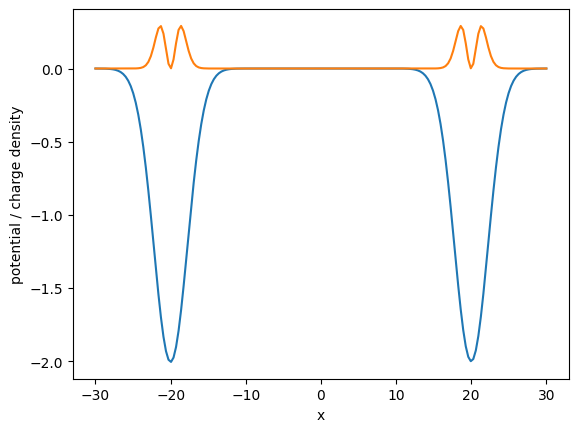

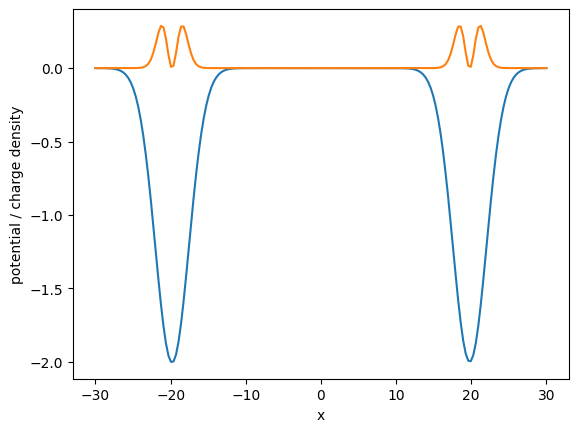

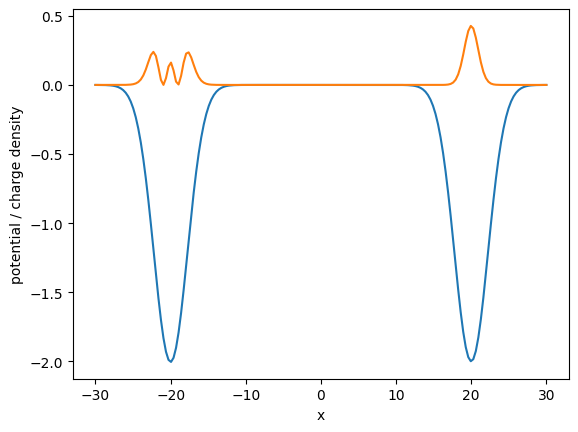

In [81]:
plt.plot(x,v_ext1)
plt.plot(x,idea.observables.density(system1, state=system1_doublestate))
plt.xlabel("x")
plt.ylabel("potential / charge density")
plt.show()
plt.close()

plt.plot(x,v_ext2)
plt.plot(x,idea.observables.density(system2, state=system2_doublestate))
plt.xlabel("x")
plt.ylabel("potential / charge density")
plt.show()
plt.close()

plt.plot(x,v_ext1)
plt.plot(x,idea.observables.density(system1, state=system1_sixthstate))
plt.xlabel("x")
plt.ylabel("potential / charge density")
plt.show()

In [82]:
#inner = np.tensordot(np.transpose(system2_doublestate.space.real),system2_doublestate.space.real)
#inner = sp.integrate.simpson(sp.integrate.simpson(np.matmul(np.transpose(system2_doublestate.space.real),system2_doublestate.space.real)))
test = np.sum(abs(system2_doublestate.space.real)*abs(system2_doublestate.space.real)) * system2.dx**system2.count
test2 = np.sum(abs(system2_doublestate.space.real)**2)*system2.dx**system2.count
test3 = np.sum(abs(system1_doublestate.space.real)*abs(system2_doublestate.space.real)) * system1.dx**system1.count
test4 = np.sum(abs(system1_sixthstate.space.real)*abs(system1_doublestate.space.real)) * system1.dx**system1.count
print(test)
print(test2)
print(test3)
print(test4)

0.9999999999999998
0.9999999999999998
0.9908851354779787
8.926255787556485e-13


In [63]:
M = np.array([[1,2],[1,-1]])
print(np.transpose(M)) #expecting [[1,1],[2,-1]]

[[ 1  1]
 [ 2 -1]]


In [76]:
print(abs(M)**2)
print(abs(M)*abs(M))

[[1 4]
 [1 1]]
[[1 4]
 [1 1]]


In [85]:

tmp = [0,1]
new = 3
tmp = np.insert(tmp[0:-1], 0, new)
new = 5
tmp = np.insert(tmp[0:-1], 0, new)
print(tmp)

[5 3]
